# HW4: SQL (Part 2)

## Syed Nisar Hussain

### sh07216@st.habib.edu.pk


### Loading the data from Microsoft SQL Server


In [10]:
import pandas as pd
import pandas.io.sql as psql
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
server = "THINKPAD-E14\\SQLEXPRESS"
database = "DS"
connection_string = f"mssql://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

In [12]:
engine = sqlalchemy.create_engine(connection_string)

with engine.connect() as conn:
    countries_df = psql.read_sql("SELECT * FROM countries", conn.connection)
    cities_df = psql.read_sql("SELECT * FROM cities", conn.connection)

In [13]:
countries_df.head()

,fact_id,country_code,country_name,country_region,country_sub_region,country_area,country_area_land,country_area_water,country_population,country_population_growth,country_birth_rate,country_death_rate,country_migration_rate
0,1,af,Afghanistan,Asia,Southern Asia,652230,652230,0,32564342,2.32,38.570000,13.89,1.51
1,2,al,Albania,Europe,Southern Europe,28748,27398,1350,3029278,0.30,12.920000,6.58,3.30
2,3,ag,Algeria,Africa,Northern Africa,2381741,2381741,0,39542166,1.84,23.670000,4.31,0.92
3,4,an,Andorra,Europe,Southern Europe,468,468,0,85580,0.12,8.130000,6.96,0.00
4,5,ao,Angola,Africa,Sub-Saharan Africa,1246700,1246700,0,19625353,2.78,38.779999,11.49,0.46


In [14]:
cities_df.head()

,city_id,city_name,city_population,capital,fact_id
0,1,Oranjestad,37000,True,216
1,2,Saint John'S,27000,True,6
2,3,Abu Dhabi,942000,True,184
3,4,Dubai,1978000,False,184
4,5,Sharjah,983000,False,184


### Analysis


**Top 20 Countries with Highest Death Rate**


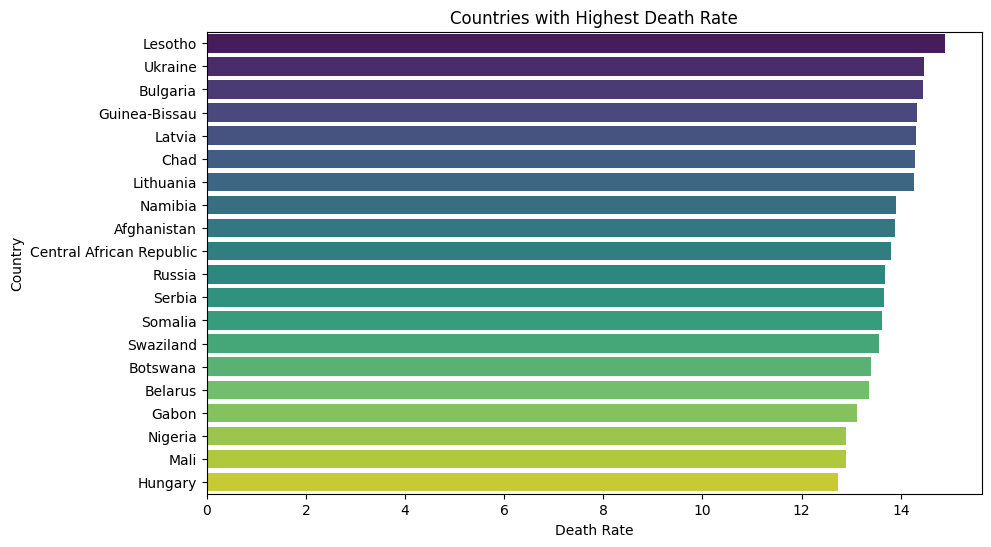

In [15]:
countries_df_filtered = countries_df.sort_values('country_death_rate', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='country_death_rate', y='country_name', data=countries_df_filtered.head(20), palette='viridis')
plt.title('Countries with Highest Death Rate')
plt.xlabel('Death Rate')
plt.ylabel('Country')
plt.show()

**Insights:** All the top 20 countries have very high death rates. All of them have a death rate above 12. It can be observed that most of these countries are from African or Eastern European region. As for African countries, this could be due to lesser advancements in infrastructure and lifestyle, problems with food and water shortages that lead to widespread malnutrition in those areas etc. As for Eastern European countries, they are very commonly known for high crime rates, and mafia/gang cultures, this could be one of the reason for the high death rate in these countries.


**Correlation Between Population Growth, Birth Rate, and Migration Rate**


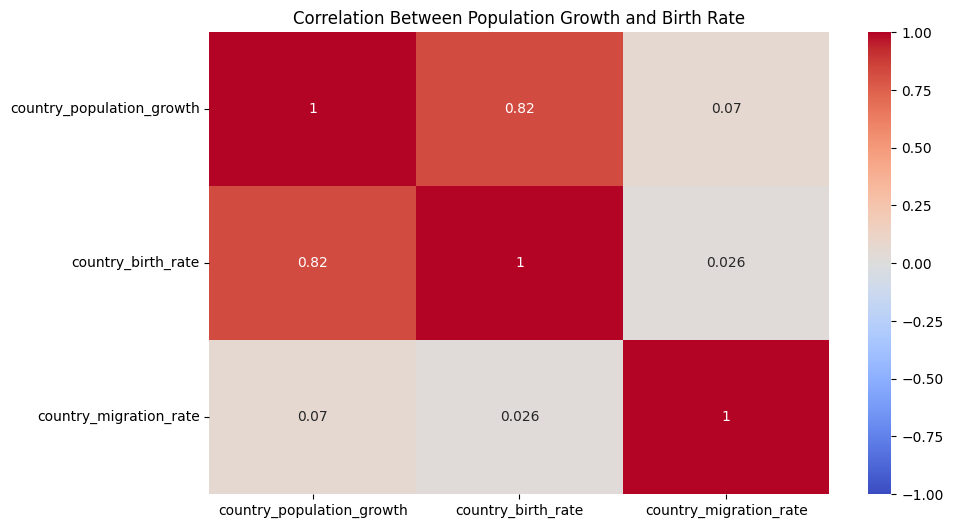

In [16]:
correlation = countries_df[['country_population_growth', 'country_birth_rate', 'country_migration_rate']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Population Growth and Birth Rate')
plt.show()

**Insights:** We can observe that the birth rate and population growth are highly positively correlated. This result makes sense and can be expected since once birth rates start going up, it is expected that the population would also rise with it. However, migration rate has no correlation with population growth at all which is a bit surprsing.


**Top 10 Countries with the Highest Capital City Population Proportion**


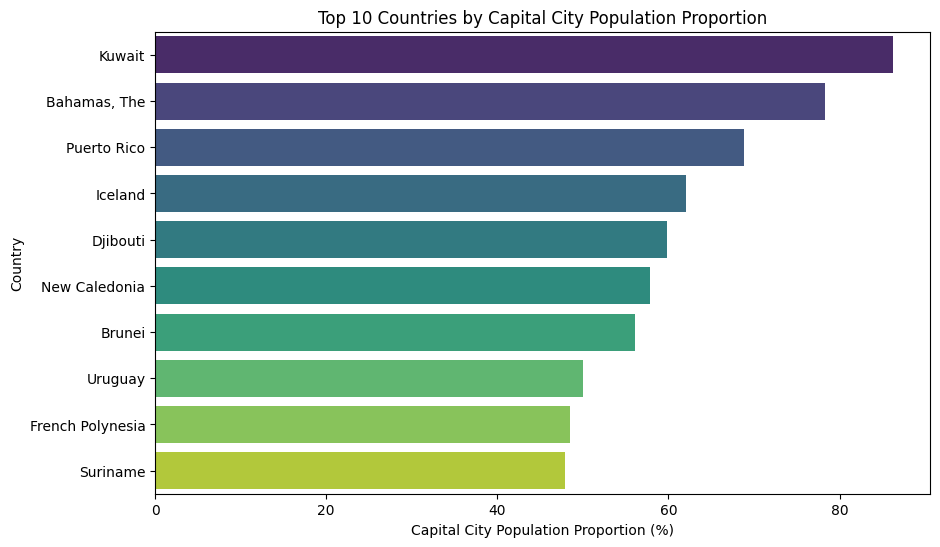

In [17]:
capital_cities_df = cities_df[cities_df['capital'] == True]

countries_df_filtered = countries_df[countries_df['country_population'] > 200000]

merged_df = pd.merge(countries_df_filtered, capital_cities_df, on='fact_id')

merged_df['capital_population_proportion'] = (merged_df['city_population'] / merged_df['country_population']) * 100

top_10_capital_proportion = merged_df[['country_name', 'city_name', 'capital_population_proportion']].sort_values(by='capital_population_proportion', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='capital_population_proportion', y='country_name', data=top_10_capital_proportion, palette='viridis')
plt.title('Top 10 Countries by Capital City Population Proportion')
plt.xlabel('Capital City Population Proportion (%)')
plt.ylabel('Country')
plt.show()


**Note:** For this analysis, we filter and use only the countries with a population higher than 200,000. This avoids including countries/territories with extremely low populations.

**Insights:** It can be seen that almost 90% of Kuwait's population resides in its capital which is very interesting. Other countries also have a very high capital city population proportion however, them being very small countries or occupied territories justifies it a bit. Uruguay is also one surprsing inclusion with nearly 50% of the country's population living in the capital.
